<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Lesson 4 - Exercise 2

Simple substitution cipher is a method of encrypting. Each plaintext alphabet is replaced by other alphabet ([Wikipedia](https://en.wikipedia.org/wiki/Substitution_cipher)). [cipher.txt](https://github.com/ikuehirata/CodingSeminarCMBR/blob/master/exercises_and_model_answers/Lesson4-files/cipher.txt) is an English text encrpyted by simple substitution cipher. Decrypt this and obtain the encryption table.

1. Frequency analysis is a powerful method to help break a simple substitution cipher. In this method, each alphabet is replaced according to the frequency of the appearance in the text. It is known that in any given stretch of written language, certain letters and combinations of letters occur with varying frequencies ([Wikipedia](https://en.wikipedia.org/wiki/Frequency_analysis)).
    1. Count the number of the appearance of each alphabet in a plaintext file `kant.txt` and plot it in a histogram.

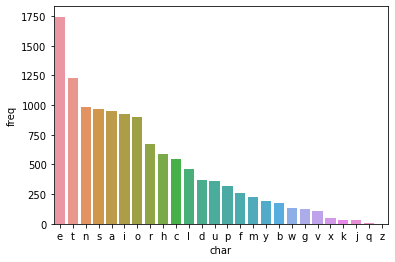

In [1]:
# open file and read txt
with open("Lesson4-files/kant.txt", "r", encoding="utf8") as f:
    dummy = f.read()

# modify the text
import re
dm2 = re.sub(r"\W", "", dummy) # remove non-alphabet characters
dm2 = dm2.lower() # make all lower case

import string
alphabets = list(string.ascii_lowercase) # list of original alphabets

import pandas as pd
import numpy as np
# frequeny for 1 character
# create dataframe
df1char = pd.DataFrame(np.zeros(len(alphabets)), index=alphabets, columns=["freq"])
df1char.index.name = "char"
# this DataFrame df1char has frequency as column and each alphabet as index

# to overwrite a value in DataFrame, use ".at"
# to count the frequency of appearance in a str, use str.count()
for i in df1char.index:
    df1char.at[i, "freq"] = dm2.count(i)
# sort by frequency
df1char.sort_values("freq", inplace=True, ascending=False)
# plot
%matplotlib inline
import seaborn as sns
sns.barplot(x=df1char.index, y=df1char["freq"])
import matplotlib.pyplot as plt
plt.show()

 2. Count the number of the appearance of the combination of any given two alphabets and plot top 20 combinations in a histogram.


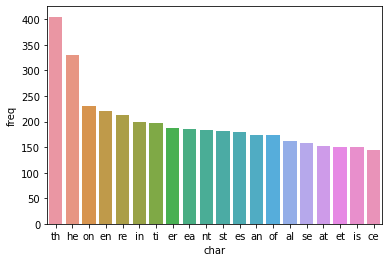

In [2]:
# create df -> count -> sort is the same procedure. Define a function
def countsort(text, chars):
    # create dataframe
    df = pd.DataFrame(np.zeros(len(chars)), index=chars, columns=["freq"])
    df.index.name = "char"
    # count frequency
    for i in df.index:
        df.at[i, "freq"] = text.count(i)
    # sort by frequency
    df.sort_values("freq", inplace=True, ascending=False)
    return df

# frequency for 2 characters
# create 2-char list
twochar = []
for c1 in alphabets:
    for c2 in alphabets:
        tx = c1+c2
        twochar.append(tx)
df2char = countsort(dm2, twochar)
# plot
plt.cla() # remove previous figure
sns.barplot(x=df2char.index[:20], y=df2char["freq"][:20])
plt.show()

  3. Count the number of the appearance of the combination of any given three alphabets and plot top 20 combinations in a histogram.

In [3]:
print(f"3-char combination has {len(alphabets)**3} ways")
print(f"length of dummy text is {len(dm2)}")

3-char combination has 17576 ways
length of dummy text is 12360


Here we have two options;  
plan A:  
1. create a list of possible 3-char combination  
2. for each element in list, count the frequency  
This takes maximum 26^3 \* 12358 = 17576 \* 12358 processes.

plan B:  
B1 make all 3-char combinations from the dummy text  
B2 count the frequency of each combination  
This takes maximum 12358 * 12358 processes

plan B is obviously faster than plan A. Let's implement plan B.

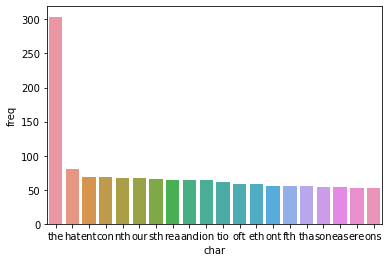

In [4]:
# create a list for all 3-char combinations in dummy text
threechar = []
for index, c in enumerate(dm2[:-2]): # enumerate returns (index number, element)
    threechar.append(dm2[index:index+3])

# "collections" module has Counter class, this gives back the number of counts in dictionary style
from collections import Counter
c = Counter(threechar)
# create dataframe from dictionary
df3char = pd.DataFrame.from_dict(c, orient="index", columns=["freq"])
df3char.sort_values("freq", inplace=True, ascending=False)
df3char.index.name = "char"

# plot
plt.cla() # remove previous figure
sns.barplot(x=df3char.index[:20], y=df3char["freq"][:20])
plt.show()

2. Using the results above, decipher the text and obtain the encryption table.

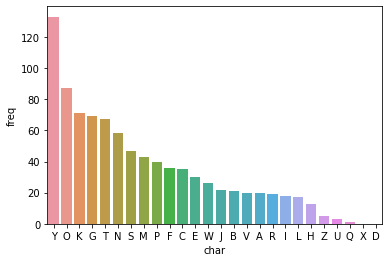

In [5]:
# open file and read txt
with open("Lesson4-files/cipher.txt", "r", encoding="utf8") as f:
    cipher = f.read()

# First, plot 1-char, 2-char, 3-char frequency graph.
alphabets_capital = list(string.ascii_uppercase)

# 1 char
cp1char = countsort(cipher, alphabets_capital)
# plot
plt.cla() # remove previous figure
sns.barplot(x=cp1char.index, y=cp1char["freq"])
plt.show()


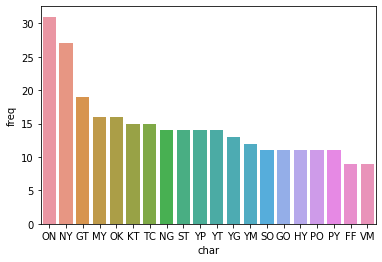

In [6]:
twochar_capital = list(map(lambda s: s.upper(), twochar))
cp2char = countsort(cipher, twochar_capital)

plt.cla() # remove previous figure
sns.barplot(x=cp2char.index[:20], y=cp2char["freq"][:20])
plt.show()

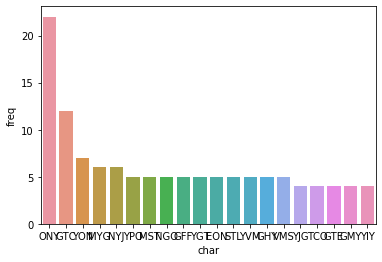

In [7]:
# create a list for all 3-char combinations in dummy text
threechar_capital = []
for index, c in enumerate(cipher[:-2]): # enumerate returns (index number, element)
    threechar_capital.append(cipher[index:index+3])

# "collections" module has Counter class, this gives back the number of counts in dictionary style
c = Counter(threechar_capital)
# create dataframe from dictionary
cp3char = pd.DataFrame.from_dict(c, orient="index", columns=["freq"])
cp3char.sort_values("freq", inplace=True, ascending=False)
cp3char.index.name = "char"

# plot
plt.cla() # remove previous figure
sns.barplot(x=cp3char.index[:20], y=cp3char["freq"][:20])
plt.show()

Comparing the results above, you can obtain the original text.
First, "ONY" is obviously "the".

In [8]:
dic = {"O":"t", "N":"h", "Y": "e"}
org = cipher.translate(str.maketrans(dic)) # translate

# for readability, insert spaces before and after "the"
org = org.replace("the", " the ")
print(org)

JeTURCLeLeTeMGFFEJKMeAE the eEethGTAE the hGTCAeBGRPeStAeFKTLPtKeHeMEAKCEtKPeeEKRtKIeWtKBKJeSTtKRBhWSthEKReHeMEKTePeePWhGtEKRGVVeGMtKAeIeWMeGFFEZTKWWhGtEKRGMeGTCthKPeIeWCGMeTKtKVVKPe the JPeFHePtK the KVSTSKTKI the JGTEWhKhGHe the JGUePtEKI the PtGtetKCeIeTC the JGTCST the GBtSKTPKIGFFJeTGTCePVeBSGFFEKIVMSTBePWhSBhStSPTKtVMRCeTttKBhGFFeTLeKTeURCLePAE the MePRFtIKMthGtMeGPKTFetGVMSTBehGHe the BMeCStKIBKTQReMSTLGTChKFCSTLhSPPtGte the JeGTPWSFFGFWGEPAeBKTPSCeMeChKTePtGTCheWSFFAeVMGSPeCAEeHeMEAKCEAeBGRPe the HRFLGMGMeGFWGEPtGZeTAEWhGtGthSTLPeeJPtKAeGTCAEWhGtBKJePKIStGTCST the WKMFC the MeGMeKTFE the HRFLGMIKM the IeWISTCGVFGBe the MeKTFEWheT the JGTEhGHeTKLMKRTCtKMePtKTKTeVMSTBeKI the VMePeTttSJeWhKJStSPTKtWeFFtKTGJeTeHeMVMeGBhePGTEthSTLeFPeARtVeGBeGTCLKKCIGSthGTCtKAKthheSPJKPthKPtSFeGTCeS the MSIhehGCZeVtStWKRFChGHeCeVMSHeChSJKIMeVRtGtSKTGTCZSTLCKJJGTEGtSJeWMStteTAETSBKFKJGBhSGHeFFStMGTPFGteCAEWZJGMMSKtt the VMSTBehttVPWWWLRteTAeMLKML


Continuing the procedure above and with a lot of guessing, you will reach to the answer... good luck!